In [1]:
import pandas as pd

In [2]:
df_fake = pd.read_csv('dataset/Fake.csv')
df_true = pd.read_csv('dataset/True.csv')

In [17]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
print(df_fake.shape)
print(df_true.shape)

(23481, 4)
(21417, 4)


In [45]:
# add labels and concatinate
df_fake['label'] = 0  # fakes
df_true['label'] = 1  # real news

df = pd.concat([df_fake, df_true], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

In [46]:
df.head()

,title,text,subject,date,label
0,LGBT Community Furious After Catholic School R...,I fear these cancellations may be based on mi...,left-news,"May 8, 2017",0
1,ESPN’S JEMELE HILL Makes Shocking Admission Ab...,ESPN anchor Jemele Hill says she deserved to b...,politics,"Oct 22, 2017",0
2,FBI chief promises to disclose any attempt to ...,WASHINGTON (Reuters) - The FBI’s acting direct...,politicsNews,"May 11, 2017",1
3,Russia denies Syrian opposition allegation ove...,MOSCOW (Reuters) - The Russian Defence Ministr...,worldnews,"September 28, 2017",1
4,WATCH: Viral Video Of Tomi Lahren Being Calle...,If you don t know who Tomi Lahren is by this p...,News,"September 15, 2017",0


In [47]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [48]:
df.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

# Date preparation

In [49]:
len(df['date'].unique())

2397

In [50]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce') #there are a lot of inccorect values

In [51]:
df.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
label               int64
dtype: object

In [52]:
len(df['date'].unique())

1011

In [58]:
df[df['date'].isna()].head(10)

,title,text,subject,date,label,year,month,day
2921,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,0,NaN,NaN,NaN
25754,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT,0,NaN,NaN,NaN
28140,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT,0,NaN,NaN,NaN
29720,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT,0,NaN,NaN,NaN
31657,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,0,NaN,NaN,NaN
32167,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,0,NaN,NaN,NaN
32575,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,0,NaN,NaN,NaN
33225,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,0,NaN,NaN,NaN
39783,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,0,NaN,NaN,NaN
41350,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT,0,NaN,NaN,NaN


In [57]:
df.isna().sum()

title       0
text        0
subject     0
date       10
label       0
year       10
month      10
day        10
dtype: int64

In [59]:
df = df.dropna(subset=['date'])

In [62]:
# add date features
df['year'] = df['date'].dt.year.astype('int32')
df['month'] = df['date'].dt.month.astype('int32')
df['day'] = df['date'].dt.day.astype('int32')

In [63]:
df.head()

,title,text,subject,date,label,year,month,day
0,LGBT Community Furious After Catholic School R...,I fear these cancellations may be based on mi...,left-news,2017-05-08,0,2017,5,8
1,ESPN’S JEMELE HILL Makes Shocking Admission Ab...,ESPN anchor Jemele Hill says she deserved to b...,politics,2017-10-22,0,2017,10,22
2,FBI chief promises to disclose any attempt to ...,WASHINGTON (Reuters) - The FBI’s acting direct...,politicsNews,2017-05-11,1,2017,5,11
3,Russia denies Syrian opposition allegation ove...,MOSCOW (Reuters) - The Russian Defence Ministr...,worldnews,2017-09-28,1,2017,9,28
4,WATCH: Viral Video Of Tomi Lahren Being Calle...,If you don t know who Tomi Lahren is by this p...,News,2017-09-15,0,2017,9,15


In [64]:
df.drop('date', axis=1, inplace=True)

In [68]:
df.head()

,title,text,subject,label,year,month,day
0,LGBT Community Furious After Catholic School R...,I fear these cancellations may be based on mi...,left-news,0,2017,5,8
1,ESPN’S JEMELE HILL Makes Shocking Admission Ab...,ESPN anchor Jemele Hill says she deserved to b...,politics,0,2017,10,22
2,FBI chief promises to disclose any attempt to ...,WASHINGTON (Reuters) - The FBI’s acting direct...,politicsNews,1,2017,5,11
3,Russia denies Syrian opposition allegation ove...,MOSCOW (Reuters) - The Russian Defence Ministr...,worldnews,1,2017,9,28
4,WATCH: Viral Video Of Tomi Lahren Being Calle...,If you don t know who Tomi Lahren is by this p...,News,0,2017,9,15


In [65]:
df.dtypes

title      object
text       object
subject    object
label       int64
year        int32
month       int32
day         int32
dtype: object

# Column prep

<Axes: xlabel='subject'>

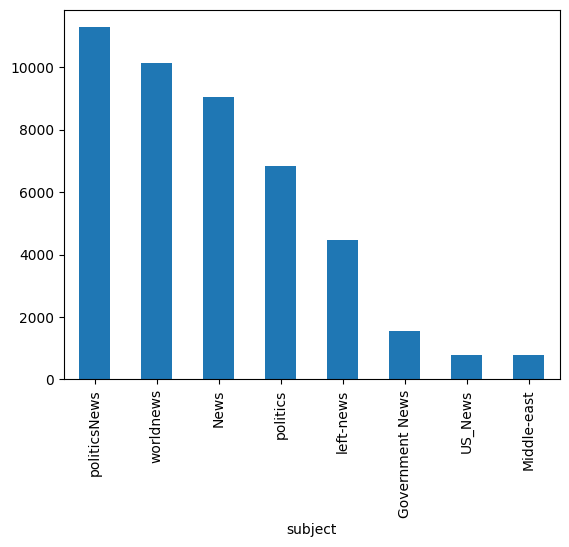

In [67]:
df['subject'].value_counts().plot(kind='bar')

In [70]:
# subject column doesn't contain valuable information
df.drop('subject', axis=1, inplace=True)

In [71]:
df.head()

,title,text,label,year,month,day
0,LGBT Community Furious After Catholic School R...,I fear these cancellations may be based on mi...,0,2017,5,8
1,ESPN’S JEMELE HILL Makes Shocking Admission Ab...,ESPN anchor Jemele Hill says she deserved to b...,0,2017,10,22
2,FBI chief promises to disclose any attempt to ...,WASHINGTON (Reuters) - The FBI’s acting direct...,1,2017,5,11
3,Russia denies Syrian opposition allegation ove...,MOSCOW (Reuters) - The Russian Defence Ministr...,1,2017,9,28
4,WATCH: Viral Video Of Tomi Lahren Being Calle...,If you don t know who Tomi Lahren is by this p...,0,2017,9,15


In [73]:
len(df.text[124])

2367

In [77]:
len(df.title[1466])

60

In [78]:
# text can be too long, takes a lot of time to process
df.drop('text', axis=1, inplace=True)

In [79]:
df.head()

,title,label,year,month,day
0,LGBT Community Furious After Catholic School R...,0,2017,5,8
1,ESPN’S JEMELE HILL Makes Shocking Admission Ab...,0,2017,10,22
2,FBI chief promises to disclose any attempt to ...,1,2017,5,11
3,Russia denies Syrian opposition allegation ove...,1,2017,9,28
4,WATCH: Viral Video Of Tomi Lahren Being Calle...,0,2017,9,15


# Tokenization

In [80]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\papul.DESKTOP-
[nltk_data]     U29R0P8.000\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\papul.DESKTOP-
[nltk_data]     U29R0P8.000\AppData\Roaming\nltk_data...


True

In [81]:
def preprocess_text(text):
    # delete symbols and make lowercase 
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()

    # delete stop words
    stop_words = set(stopwords.words('english'))
    
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return ' '.join(tokens)

In [82]:
# Применение к тексту
df['processed_title'] = df['title'].apply(preprocess_text)

In [83]:
df.head()

,title,label,year,month,day,processed_title
0,LGBT Community Furious After Catholic School R...,0,2017,5,8,lgbt community furious catholic school reject ...
1,ESPN’S JEMELE HILL Makes Shocking Admission Ab...,0,2017,10,22,espns jemele hill make shocking admission susp...
2,FBI chief promises to disclose any attempt to ...,1,2017,5,11,fbi chief promise disclose attempt stall russi...
3,Russia denies Syrian opposition allegation ove...,1,2017,9,28,russia denies syrian opposition allegation civ...
4,WATCH: Viral Video Of Tomi Lahren Being Calle...,0,2017,9,15,watch viral video tomi lahren called racist pi...


In [84]:
df.drop('title', axis=1, inplace=True)

In [85]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [86]:
df.dtypes

label               int64
year                int32
month               int32
day                 int32
processed_title    object
dtype: object

In [88]:
type(df['processed_title'][0])

str

In [89]:
df['processed_title'].str.len().max()

237

In [94]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([4.000e+00, 2.100e+01, 2.500e+01, 1.090e+02, 1.770e+02, 5.300e+02,
        1.291e+03, 2.055e+03, 4.651e+03, 5.139e+03, 7.238e+03, 4.774e+03,
        4.783e+03, 3.601e+03, 2.172e+03, 1.978e+03, 1.135e+03, 1.050e+03,
        8.380e+02, 5.060e+02, 6.590e+02, 3.750e+02, 4.270e+02, 2.690e+02,
        2.750e+02, 2.270e+02, 1.520e+02, 1.450e+02, 6.300e+01, 7.200e+01,
        4.500e+01, 2.800e+01, 1.600e+01, 7.000e+00, 1.500e+01, 7.000e+00,
        9.000e+00, 3.000e+00, 8.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  8.  ,  12.58,  17.16,  21.74,  26.32,  30.9 ,  35.48,  40.06,
         44.64,  49.22,  53.8 ,  58.38,  62.96,  67.54,  72.12,  76.7 ,
         81.28,  85.86,  90.44,  95.02,  99.6 , 104.18, 108.76, 113.34,
        117.92, 122.5 , 127.08, 131.66, 136.24, 140.82, 145.4 , 149.98,
        154.56, 159.14, 163.72, 168.3 , 172.88, 177.46, 182.04, 186.62,
        191.2 , 

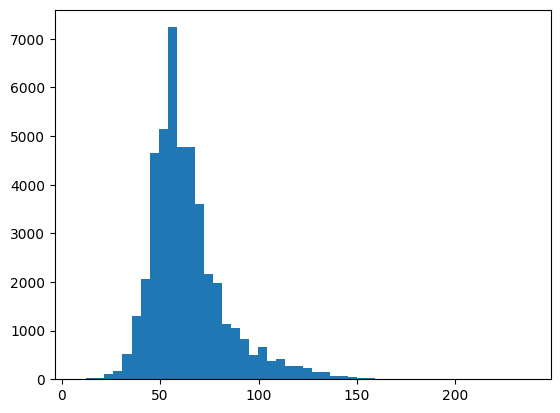

In [97]:
lengths = df['processed_title'].str.len()
plt.hist(lengths, bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac6d517110>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac6d203310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac6d25bad0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac6d4da150>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac6d2721d0>],
 'means': []}

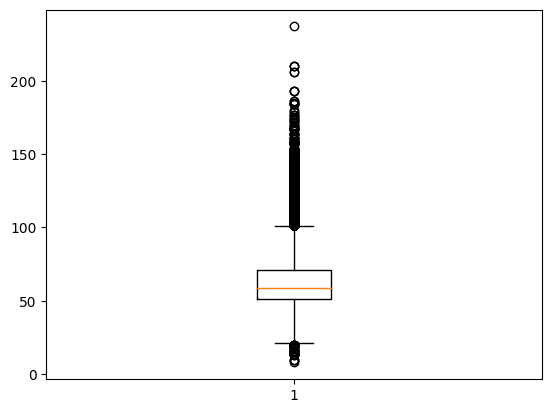

In [100]:
plt.boxplot(lengths)

In [101]:
# set params
MAX_WORDS = 10000  
MAX_SEQ_LEN = 100

In [102]:
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['processed_title'])


In [103]:
sequences = tokenizer.texts_to_sequences(df['processed_title'])
X = pad_sequences(sequences, maxlen=MAX_SEQ_LEN)

In [107]:
X.shape

(44888, 100)

In [105]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'].values, test_size=0.2)

# Models